In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pickle

Y_original=[]
def Standardization(data):
  from sklearn.preprocessing import StandardScaler
  scaler1 = StandardScaler().fit(data)
  X_original=scaler1.transform(data)
  return X_original

def DataPreProcess(filename):
    columns = [
        'duration',
        'protocol_type',
        'service',
        'flag',
        'src_bytes',
        'dst_bytes',
        'land',
        'wrong_fragment',
        'urgent',
        'hot',
        'num_failed_logins',
        'logged_in',
        'num_compromised',
        'root_shell',
        'su_attempted',
        'num_root',
        'num_file_creations',
        'num_shells',
        'num_access_files',
        'num_outbound_cmds',
        'is_host_login',
        'is_guest_login',
        'count',
        'srv_count',
        'serror_rate',
        'srv_serror_rate',
        'rerror_rate',
        'srv_rerror_rate',
        'same_srv_rate',
        'diff_srv_rate',
        'srv_diff_host_rate',
        'dst_host_count',
        'dst_host_srv_count',
        'dst_host_same_srv_rate',
        'dst_host_diff_srv_rate',
        'dst_host_same_src_port_rate',
        'dst_host_srv_diff_host_rate',
        'dst_host_serror_rate',
        'dst_host_srv_serror_rate',
        'dst_host_rerror_rate',
        'dst_host_srv_rerror_rate',
        'class'
    ]
    #data = pd.read_csv("KDD Train+ Unwanted removed.txt")
    data = pd.read_csv(filename)
    data.columns = columns
    cat_col = ['protocol_type', 'service', 'flag', 'class']
    new_categorical_columns = data[cat_col]
    new_categorical_columns.head()
    new_cat_encoded = new_categorical_columns.apply(LabelEncoder().fit_transform)
    data = data.drop(['flag', 'protocol_type', 'service'], axis=1)
    data = data.drop('class', axis=1)
    data = data.join(new_cat_encoded)
    data = data.reindex(columns, axis=1)
    X = data.drop('class', 1)
    Y_original = data['class']
    X = data.drop(['land', 'urgent', 'num_failed_logins', 'root_shell', 'su_attempted', 'num_root', 'num_shells',
                   'num_access_files', 'num_outbound_cmds', 'is_host_login', 'serror_rate', 'srv_rerror_rate'], 1)
    X_unStd=X
    X_original = Standardization(X)
    return X_original,X_unStd

def get_Y(filePath,data):
    infile = open(filePath, 'rb')
    kmeans = pickle.load(infile)
    Y_train_new = kmeans.predict(data)
    return Y_train_new

In [ ]:
X,X_unstd=DataPreProcess('KDD Train+ Unwanted removed.txt')
Y=get_Y('/content/kmeans_cluster.pkl',X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [ ]:
X_unstd.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,1
1,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,0
2,0,1,24,9,232,8153,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,1
3,0,1,24,9,199,420,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1
4,0,1,49,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,0


In [ ]:
Y=pd.DataFrame(Y)

In [ ]:
Y.head(1000)

,0
0,1
1,0
2,1
3,1
4,2
...,...
995,1
996,0
997,0
998,1


In [ ]:
print(Y[0][0])

1


In [ ]:
X_unstd.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,1
1,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,0
2,0,1,24,9,232,8153,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,1
3,0,1,24,9,199,420,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1
4,0,1,49,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,0


In [ ]:
X_unstd.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
125967,0,1,49,5,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,0
125968,8,2,49,9,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,1
125969,0,1,54,9,2231,384,0,0,1,0,...,30,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,1
125970,0,1,30,5,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,0
125971,0,1,20,9,151,0,0,0,1,0,...,77,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,1


In [ ]:
lis=[X_unstd,Y]
new_Data=pd.concat(lis,axis=1)

In [ ]:
new_Data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,0
0,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,1,1
1,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,0,0
2,0,1,24,9,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,1,1
3,0,1,24,9,199,420,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1,1
4,0,1,49,1,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,0,2


In [ ]:
new_Data.columns

Index([                   'duration',               'protocol_type',
                           'service',                        'flag',
                         'src_bytes',                   'dst_bytes',
                    'wrong_fragment',                         'hot',
                         'logged_in',             'num_compromised',
                'num_file_creations',              'is_guest_login',
                             'count',                   'srv_count',
                   'srv_serror_rate',                 'rerror_rate',
                     'same_srv_rate',               'diff_srv_rate',
                'srv_diff_host_rate',              'dst_host_count',
                'dst_host_srv_count',      'dst_host_same_srv_rate',
            'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate',        'dst_host_serror_rate',
          'dst_host_srv_serror_rate',        'dst_host_rerror_rate',
          'dst_host_srv_rerror_rat

In [ ]:
#Silouhtte Analysis:
from yellowbrick.cluster import SilhouetteVisualizer
q, mod = divmod(4, 2)
infile = open('/content/kmeans_cluster.pkl', 'rb')
kmeans = pickle.load(infile)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f013ab49610>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=4, random_state=0))

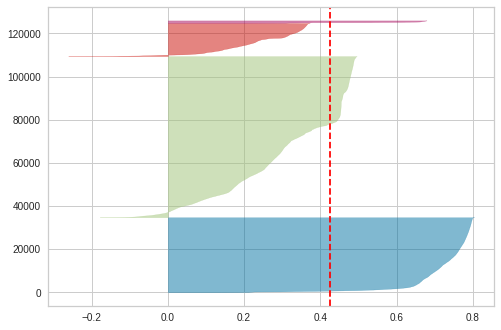

In [ ]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X,Y)

In [ ]:
print("The silhouette_score for Cluster 4 is: ",silhouette_avg)

The silhouette_score for Cluster 4 is:  0.42404801823493504


In [ ]:
from sklearn.cluster import KMeans
clus=[2,3,6]
for i in clus:
  clusterer = KMeans(n_clusters=i, random_state=10)
  cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
  silhouette_avg = silhouette_score(X, cluster_labels)
  print(
        "For n_clusters =",
        i,
        "The average silhouette_score is :",
        silhouette_avg,
    )



For n_clusters = 2 The average silhouette_score is : 0.3630842398420719
For n_clusters = 3 The average silhouette_score is : 0.40738414614126717
For n_clusters = 6 The average silhouette_score is : 0.4572915029483629


**Conclusion:** It may be a good idea to use both plots just to make sure that you select the most optimal number of clusters. ***While both provide valuable information for clustering analysis elbow method is easy to implement and provides valuable results.***

*The Elbow method did not indicate 6 as an elbow while Silhouette indicated 6.*

***But scores of Elbow method and Silhouette are significant for cluster 4. Hence number of Clusters choosen is 4.***

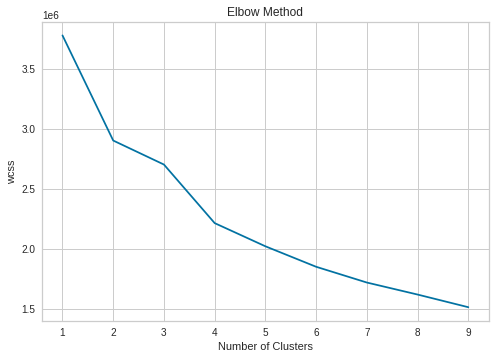

In [ ]:
wcss=[]
import matplotlib.pyplot as plt
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

**Filtering Cluster Data:**

In [ ]:
cluster_0=new_Data[new_Data[0]==Y[0][1]]

In [ ]:
cluster_0.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,0
1,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.0,0.0,1.00,1.0,0.0,0.0,0,0
5,0,1,49,5,0,0,0,0,0,0,...,0.04,0.05,0.0,0.0,1.00,1.0,0.0,0.0,0,0
6,0,1,49,5,0,0,0,0,0,0,...,0.06,0.07,0.0,0.0,1.00,1.0,0.0,0.0,0,0
7,0,1,51,5,0,0,0,0,0,0,...,0.09,0.05,0.0,0.0,1.00,1.0,0.0,0.0,0,0
8,0,1,49,5,0,0,0,0,0,0,...,0.05,0.06,0.0,0.0,1.00,1.0,0.0,0.0,0,0
10,0,1,49,5,0,0,0,0,0,0,...,0.05,0.07,0.0,0.0,1.00,1.0,0.0,0.0,0,0
13,0,1,36,5,0,0,0,0,0,0,...,0.00,0.07,0.0,0.0,1.00,1.0,0.0,0.0,0,0
14,0,1,38,5,0,0,0,0,0,0,...,0.01,0.06,0.0,0.0,1.00,1.0,0.0,0.0,0,0
19,0,1,35,5,0,0,0,0,0,0,...,0.09,0.05,0.0,0.0,1.00,1.0,0.0,0.0,0,0
20,0,1,49,5,0,0,0,0,0,0,...,0.07,0.06,0.0,0.0,0.99,1.0,0.0,0.0,0,0


In [ ]:
cluster_1=new_Data[new_Data[0]==Y[0][0]]

In [ ]:
cluster_1.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,0
0,0,2,44,9,146,0,0,0,0,0,...,0.0,0.6,0.88,0.00,0.00,0.00,0.00,0.00,1,1
2,0,1,24,9,232,8153,0,0,1,0,...,1.0,0.0,0.03,0.04,0.03,0.01,0.00,0.01,1,1
3,0,1,24,9,199,420,0,0,1,0,...,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1,1
11,0,1,24,9,287,2251,0,0,1,0,...,1.0,0.0,0.12,0.03,0.00,0.00,0.00,0.00,1,1
12,0,1,20,9,334,0,0,0,1,0,...,1.0,0.0,1.00,0.20,0.00,0.00,0.00,0.00,0,1
15,0,1,24,9,300,13788,0,0,1,0,...,1.0,0.0,0.01,0.02,0.00,0.00,0.00,0.00,1,1
16,0,0,14,9,18,0,0,0,0,0,...,1.0,0.0,1.00,1.00,0.00,0.00,0.00,0.00,0,1
17,0,1,24,9,233,616,0,0,1,0,...,1.0,0.0,0.02,0.03,0.00,0.00,0.02,0.00,1,1
18,0,1,24,9,343,1178,0,0,1,0,...,1.0,0.0,0.01,0.04,0.00,0.00,0.00,0.00,1,1
21,0,1,24,9,253,11905,0,0,1,0,...,1.0,0.0,0.01,0.02,0.00,0.00,0.00,0.00,1,1


In [ ]:
cluster_2=new_Data[new_Data[0]==Y[0][4]]
cluster_2.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,0
4,0,1,49,1,0,0,0,0,0,0,...,0.07,0.07,0.00,0.0,0.0,0.0,1.00,1.0,0,2
9,0,1,49,1,0,0,0,0,0,0,...,0.05,0.07,0.00,0.0,0.0,0.0,1.00,1.0,0,2
32,0,1,49,1,0,0,0,0,0,0,...,0.00,0.31,0.28,0.0,0.0,0.0,0.29,1.0,0,2
50,0,1,49,1,0,0,0,0,0,0,...,0.02,0.08,0.00,0.0,0.0,0.0,1.00,1.0,0,2
60,0,1,49,1,0,0,0,0,0,0,...,0.02,0.08,0.00,0.0,0.0,0.0,1.00,1.0,0,2


In [ ]:
cluster_3=new_Data[new_Data[0]==Y[0][128]]
cluster_3.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,0
128,26,1,19,9,273,903,0,5,1,0,...,0.28,0.02,0.01,0.0,0.01,0.02,0.00,0.0,1,3
189,15159,1,19,9,350,1185,0,6,1,0,...,0.56,0.02,0.00,0.0,0.00,0.00,0.00,0.0,0,3
505,1,1,19,9,1238,2451,0,28,1,0,...,0.48,0.02,0.00,0.0,0.00,0.00,0.01,0.0,0,3
524,30,1,19,9,1458,4152,0,30,1,0,...,0.25,0.03,0.01,0.0,0.00,0.00,0.00,0.0,1,3
580,0,1,19,9,1250,2451,0,28,1,0,...,0.27,0.02,0.00,0.0,0.00,0.00,0.01,0.0,0,3


Reffering to the source :[NSL KDD Dataset Description](https://towardsdatascience.com/a-deeper-dive-into-the-nsl-kdd-data-set-15c753364657)

and Source: [NSL KDD Features](https://docs.google.com/spreadsheets/d/1oAx320Vo9Z6HrBrL6BcfLH6sh2zIk9EKCv2OlaMGmwY/edit#gid=0)



The Following Points have been Noted Carefully:
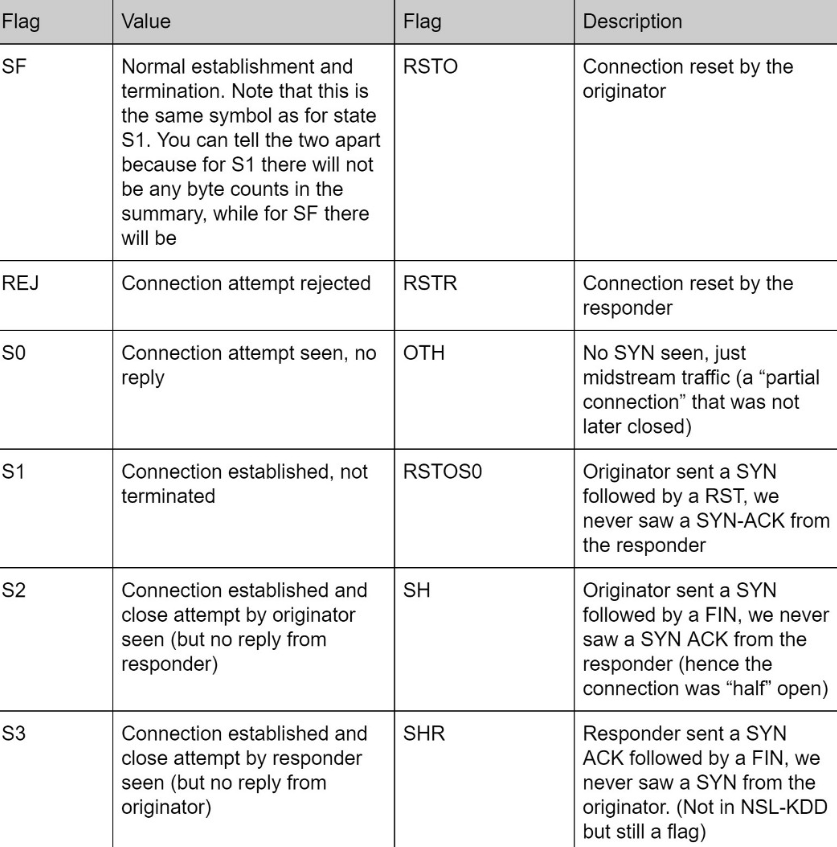





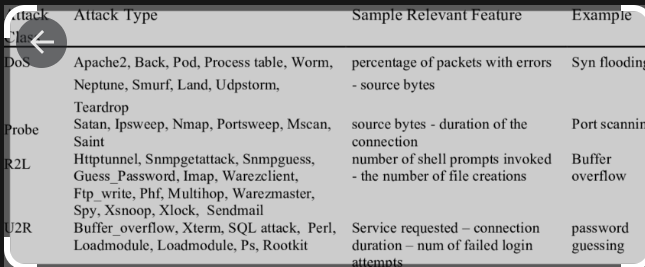

**Analysis of Cluster 0**




In [ ]:
cluster_0.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,0
count,34755.000000,34755.000000,34755.000000,34755.000000,3.475500e+04,34755.000000,34755.0,34755.000000,34755.000000,34755.000000,...,34755.000000,34755.000000,34755.000000,34755.000000,34755.000000,34755.000000,34755.000000,34755.000000,34755.000000,34755.0
mean,0.020573,1.000230,38.481916,5.036369,1.995592e+04,37.080765,0.0,0.000317,0.000460,0.001237,...,0.064297,0.072529,0.010574,0.000891,0.994152,0.994246,0.000806,0.000905,0.001065,0.0
std,3.106807,0.016961,18.341264,0.453768,3.719289e+06,4129.330687,0.0,0.017788,0.021451,0.214896,...,0.082007,0.079351,0.087584,0.014276,0.056918,0.057778,0.017776,0.020007,0.032611,0.0
min,0.000000,0.000000,0.000000,2.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,23.000000,5.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,...,0.020000,0.060000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,1.000000,49.000000,5.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,...,0.050000,0.070000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,1.000000,49.000000,5.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,...,0.070000,0.070000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0
max,576.000000,2.000000,69.000000,10.000000,6.933756e+08,649186.000000,0.0,1.000000,1.000000,40.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980000,0.500000,1.000000,0.0


In [ ]:
cluster_1.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,0
count,74699.000000,74699.000000,74699.000000,74699.000000,7.469900e+04,7.469900e+04,74699.000000,74699.000000,74699.000000,74699.000000,...,74699.000000,74699.000000,74699.000000,74699.000000,74699.000000,74699.000000,74699.000000,74699.000000,74699.000000,74699.0
mean,137.232132,1.086293,26.619500,8.927630,1.663435e+04,5.019152e+03,0.036881,0.036239,0.649487,0.463808,...,0.804961,0.043642,0.208572,0.045600,0.013768,0.005220,0.016758,0.008133,0.852234,1.0
std,1136.981555,0.548435,13.494526,0.608986,4.223995e+05,9.599376e+04,0.322175,0.285318,0.477134,31.044935,...,0.329601,0.134536,0.348926,0.126343,0.089152,0.051828,0.091312,0.067764,0.354871,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,20.000000,9.000000,7.800000e+01,4.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.720000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
50%,0.000000,1.000000,24.000000,9.000000,2.330000e+02,3.320000e+02,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
75%,0.000000,1.000000,24.000000,9.000000,3.340000e+02,1.761000e+03,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.020000,0.230000,0.030000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,32637.000000,2.000000,66.000000,10.000000,8.958152e+07,7.028652e+06,3.000000,15.000000,1.000000,7479.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [ ]:
cluster_2.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,0
count,15327.000000,15327.000000,15327.000000,15327.000000,1.532700e+04,1.532700e+04,15327.000000,15327.000000,15327.000000,15327.000000,...,15327.000000,15327.000000,15327.000000,15327.000000,15327.00000,15327.000000,15327.000000,15327.000000,15327.000000,15327.0
mean,1664.352515,1.016181,38.164611,1.743394,2.481190e+05,1.378129e+05,0.006720,0.005285,0.008743,0.031383,...,0.194120,0.299206,0.176258,0.042903,0.01581,0.008666,0.891448,0.945629,0.180531,2.0
std,6853.125878,0.126690,16.220376,1.538742,1.584188e+07,1.152620e+07,0.141372,0.082602,0.093096,3.691994,...,0.362752,0.367351,0.331508,0.149863,0.04972,0.086017,0.224107,0.198716,0.384642,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.0
25%,0.000000,1.000000,24.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.010000,0.060000,0.000000,0.000000,0.00000,0.000000,0.910000,1.000000,0.000000,2.0
50%,0.000000,1.000000,44.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.030000,0.070000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,2.0
75%,0.000000,1.000000,49.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.070000,0.590000,0.140000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,2.0
max,42908.000000,2.000000,69.000000,9.000000,1.379964e+09,1.309937e+09,3.000000,4.000000,1.000000,457.000000,...,1.000000,1.000000,1.000000,1.000000,0.94000,1.000000,1.000000,1.000000,1.000000,2.0


In [ ]:
cluster_3.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,0
count,1191.000000,1191.0,1191.000000,1191.000000,1191.000000,1191.000000,1191.0,1191.000000,1191.000000,1191.000000,...,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.0
mean,345.192275,1.0,19.172124,8.931150,941.722082,2654.130982,0.0,19.270361,0.995802,0.006717,...,0.270806,0.069597,0.035651,0.003887,0.009076,0.003157,0.022267,0.012057,0.736356,3.0
std,1956.903272,0.0,2.652051,0.639297,511.103842,4508.292437,0.0,10.807053,0.064684,0.183217,...,0.183740,0.132434,0.143950,0.044012,0.044201,0.027374,0.101239,0.060590,0.440794,0.0
min,0.000000,1.0,19.000000,0.000000,36.000000,197.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,20.000000,1.0,19.000000,9.000000,335.000000,1063.000000,0.0,6.000000,1.000000,0.000000,...,0.170000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
50%,26.000000,1.0,19.000000,9.000000,1151.000000,2451.000000,0.0,24.000000,1.000000,0.000000,...,0.230000,0.030000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0
75%,29.000000,1.0,19.000000,9.000000,1256.500000,3380.000000,0.0,28.000000,1.000000,0.000000,...,0.310000,0.050000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,1.000000,3.0
max,18022.000000,1.0,60.000000,9.000000,5830.000000,122343.000000,0.0,77.000000,1.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,0.840000,0.760000,1.000000,1.000000,1.000000,3.0
